## ReAct agent:
It is a type of the agentic ai architecture where the agent performs the loop as:-

 (Reasoning ---> Action ---> Observe ---> Reasoning)

Instead of making a plan(sequence of task) to achieve the end goal, in ReAct architecture, we do the reasoning step by step due to which we go from several loops over the brain and the tools depending upon the question and the question complexity.

When the agent gets the question, 

"what is the capital city of Nepal and what is the population of the capital city?" then,
It doesn't make the plan to reach the goal, what is does is it first reasons what is the capital city of Nepal and then after the result is accquired, it then finds the population of the result obtained from previous reasoning and in between it calls required tools and observes the answer from the tool.

Like the other Agent, this Agent is binded with tools too and makes dynamic tool calls if the appropriate tool is avaiable like TavilySearch, bing, Arxiv, Wikipidea etc. 

This is the base of almost all agentic system and basic architecture for agentic system req uiring the single-agent.

ReAct is less powerful and more costly than planner-executer architecture as we have to perform reasoning in the every step where as the planner-executer agent does it ones and executes it step-by-step as plan without invoking llm(brain) for next step which is more costly and high bills.




In [2]:
from langchain.tools import tool
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, BaseMessage, SystemMessage, ToolMessage, AIMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_groq import ChatGroq
from pydantic import BaseModel, Field
from typing import Annotated, TypedDict, Literal
from dotenv import load_dotenv
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_tavily import TavilySearch
import os

C:\Users\Nitro\AppData\Roaming\Python\Python313\site-packages\pydantic\_internal\_fields.py:198: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  warnings.warn(
C:\Users\Nitro\AppData\Roaming\Python\Python313\site-packages\pydantic\_internal\_fields.py:198: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  warnings.warn(


In [3]:
load_dotenv()

True

In [4]:
llm = ChatGroq(
    model=os.getenv("model"),
    api_key=os.getenv("api_key")
)

In [5]:
# state
import operator
class Messagestate(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]
    plan : str

class Plan(BaseModel):
    plan : str = Field(description="the plan should in string format in point wide form")

PlanFormat = PydanticOutputParser(pydantic_object=Plan)

In [6]:
arxiv_wallpaper = ArxivAPIWrapper(top_k_results= 1, doc_content_chars_max= 400)
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wallpaper)

wikipedia_wallpaper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max= 150 )
wikipedia_tool = WikipediaQueryRun(api_wrapper=wikipedia_wallpaper)

tavily_tool = TavilySearch(max_results=1, topic='general', include_answer=True)

tavily_tool.invoke({'query' : "What are the latest breakthroughs in AI for 2026?"})

{'query': 'What are the latest breakthroughs in AI for 2026?',
 'follow_up_questions': None,
 'answer': "Generative AI dominates AI breakthroughs in 2026, now integrated into diverse fields beyond content creation. Advanced neural networks and quantum computing enhance AI capabilities. AI's role in healthcare and autonomous systems grows significantly.",
 'images': [],
 'results': [{'url': 'https://www.trigyn.com/insights/ai-trends-2026-new-era-ai-advancements-and-breakthroughs',
   'title': 'AI Trends in 2026: A New Era of AI Advancements and Breakthroughs',
   'content': 'Generative AI continues to lead major AI advancements in 2026. Once primarily used for content generation, it is now embedded into domains as',
   'score': 0.99991846,
   'raw_content': None}],
 'response_time': 1.93,
 'request_id': '1b2b7569-8f8e-4298-abd1-bc7cb576ca9c'}

In [7]:
print(wikipedia_tool.invoke("Criastiano Ronaldo"))

No good Wikipedia Search Result was found


In [8]:
from langchain.tools import tool

In [9]:

# Define tools
@tool
def multiply(a: int, b: int)->int:
    """used to Multiply two given number `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a * b


@tool
def add(a: int, b: int) -> int:
    """used to Adds two given number`a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a + b

@tool
def subtract(a: int, b: int) -> int:
    """used to Subtract two given number a and b. 
    Args: 
    a: First int b: Second int
    """
    return a - b

@tool
def divide(a: int, b: int) -> float:
    """used to Divide two given number a and b.
    Args:
        a: First int
        b: Second int
    """
    return a / b

@tool
def root_tool(a: float, b : float, c : float)-> str:
    '''used to solve an quadratic quation given the 3 parametes, a, b and c where the eauipon is ax^2+bx+c=0 and return the value of x'''
    discrimination =  b**2 - (4*a*c)
    val = discrimination
    if val < 0:
        return "There are imaginary root"
    elif val == 0:
        root = (-b)/(2*a)
        return f"The root is {root} and {root}"
    else:
        root1 = (-b + discrimination**0.5)/(2*a)
        root2 = (-b - discrimination**0.5)/(2*a)
        return {'result' : f"The roots are : {root1} and {root2}"}


# Augment the LLM with tools
tools = [add, subtract, multiply, divide, arxiv_tool, wikipedia_tool, tavily_tool, root_tool]
tools_by_name = {tool.name: tool for tool in tools}
llm_with_tools = llm.bind_tools(tools)
print(tools_by_name)

{'add': StructuredTool(name='add', description='used to Adds two given number`a` and `b`.\n\nArgs:\n    a: First int\n    b: Second int', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000202584463E0>), 'subtract': StructuredTool(name='subtract', description='used to Subtract two given number a and b. \nArgs: \na: First int b: Second int', args_schema=<class 'langchain_core.utils.pydantic.subtract'>, func=<function subtract at 0x0000020258446200>), 'multiply': StructuredTool(name='multiply', description='used to Multiply two given number `a` and `b`.\n\nArgs:\n    a: First int\n    b: Second int', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000020258262340>), 'divide': StructuredTool(name='divide', description='used to Divide two given number a and b.\nArgs:\n    a: First int\n    b: Second int', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000020258446700>), '

In [10]:
from langgraph.graph import MessagesState


# Nodes
def llm_call(state: MessagesState):
    """LLM decides whether to call a tool or not"""

    return {
        "messages": [
            llm_with_tools.invoke(state["messages"])
        ],
    }

def tool_node(state: dict):
    """Performs the tool call"""
    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}


# Conditional edge function to route to the tool node or end based upon whether the LLM made a tool call
def should_continue(state: MessagesState) -> Literal["tool_node", END]:
    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""

    messages = state["messages"]
    last_message = messages[-1]

    # If the LLM makes a tool call, then perform an action
    if last_message.tool_calls:
        return "tool_node"

    # Otherwise, we stop (reply to the user)
    return END

checkpointer = MemorySaver()
# Build workflow
agent_builder = StateGraph(MessagesState)

# Add nodes
agent_builder.add_node("llm_call", llm_call)
agent_builder.add_node("tool_node", tool_node)

# Add edges to connect nodes
agent_builder.add_edge(START, "llm_call")
agent_builder.add_conditional_edges(
    "llm_call",
    should_continue,
    ["tool_node", END]
)
agent_builder.add_edge("tool_node", "llm_call")
# agent_builder.add_edge("tool_node", "llm_call")

# Compile the agent
agent = agent_builder.compile(checkpointer=checkpointer)

# Show the agent
# display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

# Invoke
messages = [HumanMessage(content="multiply 1000 with 4 and Who made Python language")]
config = {'configurable' : {'thread_id' : 2}}
messages = agent.invoke({"messages": messages}, config=config)
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

multiply 1000 with 4 and Who made Python language
================================== Ai Message ==================================
Tool Calls:
  multiply (56ea68vk1)
 Call ID: 56ea68vk1
  Args:
    a: 1000
    b: 4
  wikipedia (qam9k3hes)
 Call ID: qam9k3hes
  Args:
    query: Guido van Rossum
================================= Tool Message =================================

4000
================================= Tool Message =================================

Page: Guido van Rossum
Summary: Guido van Rossum (Dutch: [ˈxidoː vɑn ˈrɔsʏm]; born 31 January 1956) is a Dutch programmer. He is the creator of the Py
================================== Ai Message ==================================

The result of multiplying 1000 by 4 is 4000. Python was created by Guido van Rossum.


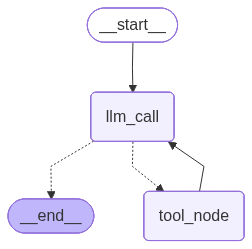

In [11]:
agent

In [12]:
msg = agent.get_state(config=config).values
msg


{'messages': [HumanMessage(content='multiply 1000 with 4 and Who made Python language', additional_kwargs={}, response_metadata={}, id='e826de83-23fa-4717-9e2b-41cb34cad34b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '56ea68vk1', 'function': {'arguments': '{"a":1000,"b":4}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'qam9k3hes', 'function': {'arguments': '{"query":"Guido van Rossum"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 2607, 'total_tokens': 2673, 'completion_time': 0.171945438, 'completion_tokens_details': None, 'prompt_time': 0.064225043, 'prompt_tokens_details': None, 'queue_time': 0.810184624, 'total_time': 0.236170481}, 'model_name': 'meta-llama/llama-4-maverick-17b-128e-instruct', 'system_fingerprint': 'fp_992318f10a', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7f02c4e6-f50e-4b44-aae9-9dafb88b6dff-0', tool_calls=[{'name

In [13]:
for m in msg['messages']:
    if isinstance(m, HumanMessage):
        print('Human')
        print(m.content)
    elif isinstance(m, AIMessage):
        print('\nAI')
        # print(m.additional_kwargs['reasoning_content'])
        print(m.content)
        print(m.tool_calls)
    else:
        print("\ntool")
        print(m)
    print('='*100)

Human
multiply 1000 with 4 and Who made Python language

AI

[{'name': 'multiply', 'args': {'a': 1000, 'b': 4}, 'id': '56ea68vk1', 'type': 'tool_call'}, {'name': 'wikipedia', 'args': {'query': 'Guido van Rossum'}, 'id': 'qam9k3hes', 'type': 'tool_call'}]

tool
content='4000' id='64bfa5f8-9b46-46f1-984c-e8da1634ff81' tool_call_id='56ea68vk1'

tool
content='Page: Guido van Rossum\nSummary: Guido van Rossum (Dutch: [ˈxidoː vɑn ˈrɔsʏm]; born 31 January 1956) is a Dutch programmer. He is the creator of the Py' id='4f331433-1dc2-4808-aeec-10bbebef9298' tool_call_id='qam9k3hes'

AI
The result of multiplying 1000 by 4 is 4000. Python was created by Guido van Rossum.
[]


In [14]:
for m in agent.get_state(config=config).values['messages']:
    print(m)

content='multiply 1000 with 4 and Who made Python language' additional_kwargs={} response_metadata={} id='e826de83-23fa-4717-9e2b-41cb34cad34b'
content='' additional_kwargs={'tool_calls': [{'id': '56ea68vk1', 'function': {'arguments': '{"a":1000,"b":4}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'qam9k3hes', 'function': {'arguments': '{"query":"Guido van Rossum"}', 'name': 'wikipedia'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 2607, 'total_tokens': 2673, 'completion_time': 0.171945438, 'completion_tokens_details': None, 'prompt_time': 0.064225043, 'prompt_tokens_details': None, 'queue_time': 0.810184624, 'total_time': 0.236170481}, 'model_name': 'meta-llama/llama-4-maverick-17b-128e-instruct', 'system_fingerprint': 'fp_992318f10a', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--7f02c4e6-f50e-4b44-aae9-9dafb88b6dff-0' tool_calls=[{'name': 'multiply', 'args': {'a': 1000, 'b': 4}, 'id'

In [15]:
print(agent.get_state(config=config).values['messages'][-1].content)

The result of multiplying 1000 by 4 is 4000. Python was created by Guido van Rossum.


In [16]:
messages = [HumanMessage(content="give me the recent AI new and then multiply 48459594144 by 29854854824545")]
config = {'configurable' : {'thread_id' : 3}}
messages = agent.invoke({"messages": messages}, config=config)
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

give me the recent AI new and then multiply 48459594144 by 29854854824545
================================== Ai Message ==================================
Tool Calls:
  tavily_search (m6hp4x0qr)
 Call ID: m6hp4x0qr
  Args:
    query: recent AI news
    topic: news
  multiply (vxt3jf5zn)
 Call ID: vxt3jf5zn
  Args:
    a: 48459594144
    b: 29854854824545
================================= Tool Message =================================

{'query': 'recent AI news', 'follow_up_questions': None, 'answer': "Apple's new AI-powered Siri is set to debut in 2026. This version will be completely reimagined. It marks a significant AI breakthrough.", 'images': [], 'results': [{'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates', 'title': 'Latest AI News and AI Breakthroughs that Matter Most', 'content': 'Summary: Apple has officially announced that a completely reimagined, AI-powered version of Siri is s